Material da live (https://www.youtube.com/watch?v=F6ZLolvumLk&list=PLIHpLBNsiHE2FuCovm4Mx0Cx1rpJusk9K&index=2) do canal minerando dados com anotações personalizadas
# **K Nearest Neighbors - KNN Vizinhos próximos**

- Classifica ou prediz amostras de dados estejam em planos similares

Como funciona?

- Primeira etapa: **Inicialização**
  - Preparar conjunto de dados de entrada e saída (Pegar o dataset de entrada e especificar o que é entrada e saída. O que são as features(dados que serão utilizados para aprendizado do algoritimo) e o que é a classe (O que está sendo classificado).
  - Preparar o valor de K (O parâmetro K especifica quantas amostras serão comparados)
  - **Para** cada nova amostra **faça**:
    - Calcula distância para todas as amostras e todas as amostras do conjunto de treinamento
    - Determina o conjunto de K's distâncias mais próximas
    - No cenário de classificação (mais utilizada com Knn), o rótulo com mais representantes no conjunto dos K's
    - Vizinho será o escolhido
  - Fim **para**
  - **Retornar**: conjunto de rótulos de classificação

IMPORTAR AS BIBLIOTECAS NECESSÁRIAS


In [4]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

In [12]:
# Base de dados wine
wine = datasets.load_wine()

# criando dataframe
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
# Como no dataframe não existe um atributo de classe, deverá ser criado um novo atributo com base no atributo wine.target
df_wine['class'] = wine.target

In [ ]:
df_wine.head()

In [13]:
df_wine.info()
# Como a base de dados está correnta, com tipos de dados corretos, sem nulos não houve necessidade de limpa-los

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [14]:
# verificar as frequencias das amostras das classes
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

**Quando usar o Algoritmo KNN**

- Pode ser utilizado para tarefas: 
  - Classificação: Uma vez que é ranqueado pelas (k) amostras mais próximas, o algoritimo faz a votação pela classe mais próxima (majoritária) a partir das amostras selecionadas, para determinar a classe da nova amostra de teste. 
  - Regressão: Ao invés de utilizar ranqueamento de classe, na regressão é calculado o valor médio (média ou mediana) entre as amostras mais próximas.
- Simplicidade e fácil interpretação
- Arquitetura Lazy ("Treinamento" rápido)
  - Knn não possui fase de treinamento, ele nao faz nenhuma suposição do seu treino. Eu já chego no resultado aplicando as tarefas de classificação ou regressão.
- Flexibilidade de Métodos de Distância (pode ser utilizado vários tipos de métricas de distância)
- Rápido tempo de predição
- Nenhuma suposição quanto a distribuição dos dados.

In [18]:
# Separando os dados de treino e teste
from sklearn.model_selection import train_test_split

# conjunto de dados: df_wine.drop('class',axis=1) estará dropando o atributo class da amostra para ser considerado apenas as features
# conjunto de classes: df_wine['class'] 
# test_size = 30% do conjunto de dados será usado pra teste e 70% pra treino
# x_train: dados do conjunto de treino
# x_test: dados do conjunto de teste
# y_train: classes do conjunto de treino
# y_test:  classes do conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(df_wine.drop('class',axis=1), df_wine['class'], test_size=0.3)

In [19]:
# Instanciar o classificador pra trabalhar o KNN
from sklearn.neighbors import KNeighborsClassifier

- **n_neighbors**: Número de vizinhos (Default=5).
  - parametro K
  - Especifica quantidade de amostras mais proximas serao comparadas para chegar no valor de classe no cenário de classificação
  - Quais amostras serão comparadas pra recuperar o valor médio ou da mediana no cenário de regressão
- **weights**: Peso de amostras vizinhas (Default=uniform).
  - amostras vizinhas mais próximas elas podem ter pesos diferentes
- **metric**: Métrica utilizada para o cálculo de distância (Default=minkowski).
  - Ex: Euclidiana, Manhattan, Minkowski
- **p**: Parametro de poder para a métrica (Default=2).
  - Valor aonde é especificado a variação da métrica. Ex = 1 variáção da distância euclidiana
- **n_jobs**: Número de jobs paralelos para executar no momento da busca de vizinhos. (Default=1)
  - Se -1 >> irá utilizar todos os jobs possíveis no processo de predição

In [20]:
# Especifica o valor de vizinhos
knn = KNeighborsClassifier(n_neighbors=3)

In [21]:
# Treinando o algoritmo com os dados de treinamento ("preparação" já que knn não tem etapa de treinamento)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [23]:
# Executando KNN com o conjnto de teste
resultado = knn.predict(x_test)
resultado

array([2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 2, 0, 1, 0])

**Técnicas de validação**

In [24]:
# Matriz de confusão
print(pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['               Predito'],margins=True))
# ideal que seja feito um crossvalidation e não train_test_split

               Predito   0   1   2  All
Real                                   
0                       17   1   2   20
1                        5  11   1   17
2                        2   8   7   17
All                     24  20  10   54


**Metricas de classificação**

In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.71      0.85      0.77        20
     class_1       0.55      0.65      0.59        17
     class_2       0.70      0.41      0.52        17

    accuracy                           0.65        54
   macro avg       0.65      0.64      0.63        54
weighted avg       0.66      0.65      0.64        54



**Otimizando o Parametro K utilizando gridsearch**

# Automatiza o processo de escolha de parametros

In [28]:
from sklearn.model_selection import GridSearchCV

In [41]:
# Definindo a lista de valores para os parametros
k_list = list(range(1,31)) 
weight_list = ['uniform','distance']
p_list = [1,2]

In [42]:
# Cria um dicionário para os parametros serem passados para o gridsearch
parametros = dict(n_neighbors=k_list, weights=weight_list, p=p_list)

In [31]:
parametros

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'p': [1, 2],
 'weigth_list': ['uniform', 'distance']}

In [43]:
# instanciando o objeto GridSearch
# cv = numero de fontes que vai fazer o processo de validação cruzadas
# metrica de scorin é acurácia
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

In [44]:
# Treinando o objeto
grid.fit(df_wine.drop('class',axis=1), df_wine['class'])
# 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [45]:
# Verificar os valores de scores
grid.cv_results_

{'mean_fit_time': array([0.00326791, 0.00232048, 0.00215349, 0.00185947, 0.0019331 ,
        0.0018023 , 0.0019053 , 0.00190635, 0.0020277 , 0.00208168,
        0.00203638, 0.00188785, 0.00214596, 0.00216494, 0.00203557,
        0.002004  , 0.00192299, 0.00207481, 0.00196886, 0.00192709,
        0.00188808, 0.00183949, 0.00185266, 0.00182438, 0.00188251,
        0.00191073, 0.00185571, 0.00189857, 0.0019093 , 0.00199094,
        0.0019259 , 0.00262775, 0.00193696, 0.00185132, 0.0020319 ,
        0.00192585, 0.00198727, 0.00201383, 0.00199165, 0.00199337,
        0.00204911, 0.00191031, 0.00193744, 0.00190897, 0.0019527 ,
        0.00195584, 0.00199108, 0.00214243, 0.00196319, 0.00212169,
        0.00211401, 0.00195713, 0.00204015, 0.0019506 , 0.00208535,
        0.00199981, 0.00193195, 0.00193586, 0.00192723, 0.00200605,
        0.00207319, 0.00203209, 0.00188498, 0.00190783, 0.00189676,
        0.00191288, 0.00194192, 0.00186563, 0.00226645, 0.0028275 ,
        0.0024569 , 0.00238066,

In [47]:
print("Melhores parametros {} com o valor de acurácia {}".format(grid.best_params_, grid.best_score_))

Melhores parametros {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} com o valor de acurácia 0.8093650793650793


**Visualizando as fronteiras de complexidade**
Visualizar o número de vizinhos do KNN


In [54]:
# Selecionar os dados
x = wine.data[:,[0,2]]
y = wine.target

In [58]:
# Função para plot de fronteiras de acordo com o número de vizinhos

def plot_fronteiras(n_vizinhos):
    knn = KNeighborsClassifier(n_neighbors=n_vizinhos)
    knn.fit(x, y)
    plt.figure(figsize=(8,5))
    plot_decision_regions(x,y,clf=knn,legend=2)
    plt.xlabel('alcohol')
    plt.ylabel('malic_acid')
    plt.title('Fronteiras de Complexidade - KNN')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


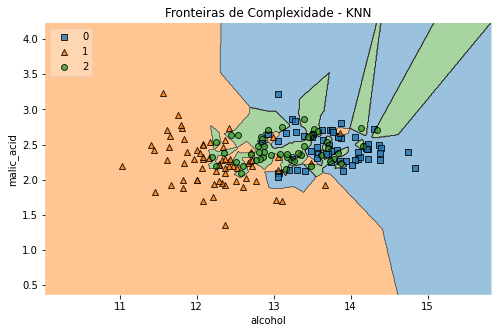

In [64]:
plot_fronteiras(1)
# Cada vez que aumenta o número de K ele vai errar com mais frequencia a distribuição das classes

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


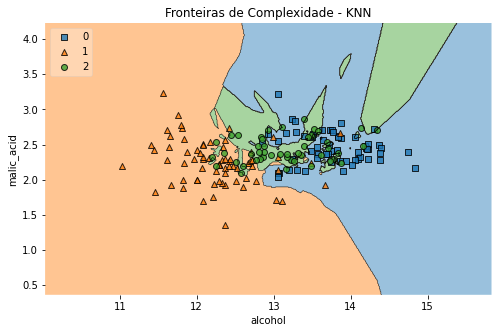

In [60]:
plot_fronteiras(3)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


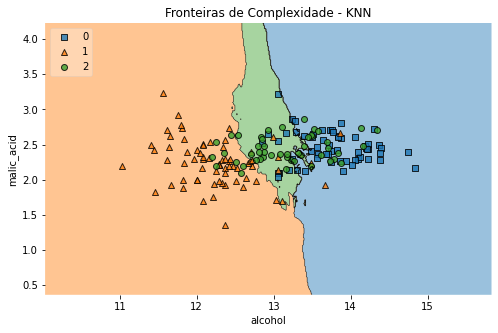

In [61]:
plot_fronteiras(30)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


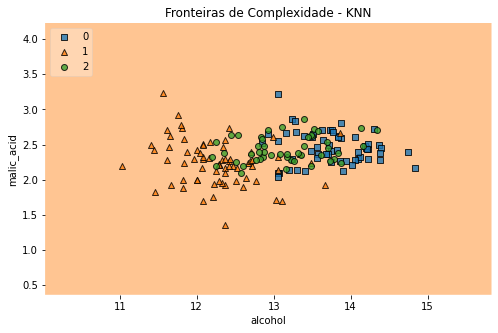

In [63]:
plot_fronteiras(178)